# CHAPTER 10. Machine Learning in Chemistry

## 10.1. Introduction to Machine Learning in Chemistry

Machine learning (ML) has emerged as a transformative tool in chemistry, offering new approaches to solving complex chemical problems. By leveraging patterns in data, ML algorithms can predict molecular properties, optimize chemical reactions, design new materials, and more, often with greater efficiency than traditional methods.

### 10.1.1. What is Machine Learning?

Machine Learning is a subset of artificial intelligence (AI) focused on building systems that learn from and make predictions or decisions based on data. ML algorithms improve their performance as the amount of data available for learning increases.

### 10.1.2. Types of Machine Learning

- **Supervised Learning:** Models are trained on labeled data, learning to predict outputs from inputs.
- **Unsupervised Learning:** Models identify patterns in data without any labels.
- **Reinforcement Learning:** Models learn to make sequences of decisions by receiving feedback on their actions.

### 10.1.3. Applications of Machine Learning in Chemistry

- **Predictive Modeling:** Using ML to predict properties of molecules such as solubility, toxicity, reactivity, or the outcomes of chemical reactions such as yield, chemoselectivity and regioselectivity.
- **Reaction Optimization:** Finding optimal conditions for chemical reactions.
- **Quantitative Analysis:** Using ML to perform quantitative structure-activity relationships (QSAR) and quantitative structure-property relationships (QSPR).
- **Drug Discovery:** Virtual screening, ADMET prediction.
- **Molecular Dynamics and Simulations:** Applying ML to improve the efficiency of molecular dynamics simulations.
- **Material Design:** Discovering new materials with desired properties.

### 10.1.4. Challenges and Limitations

**Generalization and Overfitting**

- The balance between model complexity and predictive power.
- Methods to prevent overfitting such as cross-validation.

**Interpretability**

- The "black box" nature of some ML models and the importance of model interpretability in chemistry.

## 10.2. Data for Machine Learning in Chemistry

### 10.2.1. Data Acquisition

In computational chemistry, data acquisition is a critical step. The quality and quantity of data directly impact the performance of machine learning models. There are several public databases where researchers can find a wealth of chemical data:

- **PubChem:** A repository of chemical molecules and their biological activities. It's a key resource for information on chemical substances and their biological activities.

- **ChEMBL:** A manually curated database of bioactive molecules with drug-like properties. ChEMBL integrates chemical, bioactivity, and genomic data.

- **Protein Data Bank (PDB):** An archive containing 3D structural data of proteins, nucleic acids, and complex assemblies. Vital for studies in structural biology.

- **ZINC Database:** A free database used for virtual screening and containing over 35 million purchasable compounds in 3D formats.

- **MoleculeNet:** A benchmark database specifically designed for molecular machine learning. It includes a diverse set of molecular datasets for various property prediction tasks.

- **Open Reaction Database (ORD):** A free, open-access database that collects chemical reaction data. It is an important resource for researchers studying reaction mechanisms and kinetics.

- **Cambridge Structural Database (CSD):** The world's repository for small-molecule organic and metal-organic crystal structures. It's essential for the study of molecular and crystal structures.

In addition to structural databases, spectral databases are vital for researchers working with spectroscopic data. These databases provide spectra (like NMR, IR, UV/Vis) that are essential for understanding molecular properties and behavior. Examples include the NIST Chemistry WebBook and Spectral Database for Organic Compounds (SDBS).

These databases offer web interfaces and APIs for data access. Tools like RDKit facilitate fetching and processing chemical data from these sources. Efficient data retrieval and manipulation are key to the success of machine learning applications in computational chemistry.

### 10.2.2. Data Preprocessing

Preprocessing is crucial in transforming raw data into a format suitable for machine learning. It involves cleaning data, handling missing values, normalization, feature extraction, and data transformation. Preprocessed data leads to more efficient training of machine learning models, can enhance model accuracy, and helps in achieving more reliable predictions.

Preprocessing steps include:
- **Cleaning Data:** Removing duplicates, handling missing values, or filtering out irrelevant data.
- **Feature Extraction:** Transforming chemical compounds into a suitable format for machine learning, such as SMILES (Simplified Molecular Input Line Entry System) strings, molecular fingerprints, or graph representations.
- **Normalization:** Scaling data to a specific range or distribution. This is important for methods sensitive to the scale of input data.
- **Data Transformation:** Converting data into formats that can be efficiently processed by ML algorithms, such as one-hot encoding for categorical data.
- **Data Augmentation:** Generating additional data points from existing data. In computational chemistry, this might involve generating conformers of molecules.
- **Dimensionality Reduction:** High-dimensional data, often encountered in chemistry, can lead to issues like overfitting and long training times. Dimensionality reduction techniques, such as Principal Component Analysis (PCA) or t-Distributed Stochastic Neighbor Embedding (t-SNE), reduce the number of features while retaining most of the important information. This step is crucial for simplifying models, improving interpretability, and sometimes enhancing model performance.

## 10.3. Chemical Feature Extraction

Feature extraction in chemistry involves transforming molecular data into a format that machine learning algorithms can understand and process. This process typically involves converting molecular structures into numerical descriptors or fingerprints.
The Role of Features

Features are the backbone of any machine learning model in computational chemistry. They represent the chemical information in a format suitable for analysis. The choice of features has a significant impact on the model's ability to learn and make accurate predictions.

Feature engineering is the process of creating new features or modifying existing ones to improve model performance. Feature selection involves choosing a subset of available features based on their importance and relevance to the task.

Types of Chemical Features:

- **Molecular Descriptors:** Quantitative representations of molecular properties (e.g., molecular weight, logP, number of hydrogen bond donors and acceptors).
- **Molecular Fingerprints:** Binary or count vectors representing the presence or absence of certain substructural features in the molecule.

Selecting the appropriate features for a specific prediction task is crucial:

- **Relevance to the Prediction Task:** Features should capture information that is relevant to the property or behavior being predicted. For instance, solubility prediction might require features related to polarity and molecular size, while toxicity prediction might focus on reactivity and certain functional groups.

- **Data Complexity and Model Overfitting:** Using too many features, especially irrelevant ones, can increase the complexity of the model unnecessarily and lead to overfitting, where the model performs well on training data but poorly on unseen data.

- **Computational Efficiency:** Some features might be computationally expensive to calculate. Balancing detail with computational efficiency is key, especially for large datasets.

- **Interpretability:** The ability to interpret how features influence predictions is important for model trustworthiness, especially in drug discovery and other critical applications.

In the following section, we will use RDKit to extract various types of chemical features for a molecule:

In [1]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors, Draw, Fragments, MACCSkeys, rdMolDescriptors
from rdkit.Avalon import pyAvalonTools

### 10.3.1. Molecular Descriptors

 The full list of molecular descriptors can be found in [RDKit documentation](https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors). Here are some common descriptors that we can extract from a molecule using RDKit:

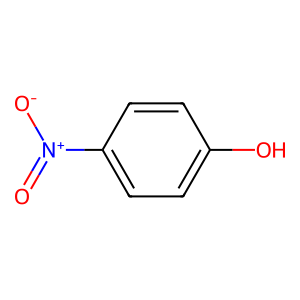

In [2]:
# Example molecule: p-Nitrophenol
smiles = 'OC1=CC=C([N+]([O-])=O)C=C1'
mol = Chem.MolFromSmiles(smiles)
Draw.MolToImage(mol)

**Molecular weight**

In [3]:
# Get MW with RDKit
mw = Descriptors.MolWt(mol)
print(mw)

139.11


**Number of hydrogen donors and acceptors**

In [4]:
# Get number of hydrogen donors with RDKit
h_donors = Descriptors.NumHDonors(mol)
print(h_donors)

1


In [5]:
# Get number of hydrogen acceptors with RDKit
h_acceptors = Descriptors.NumHAcceptors(mol)
print(h_acceptors)

3


**Number of heteroatoms**

In [6]:
# Get number of heteroatoms with RDKit
heteroatoms = Descriptors.NumHeteroatoms(mol)
print(heteroatoms)

4


**Number of rings**

In [7]:
# Get number of all rings with RDKit
ring_count = Descriptors.RingCount(mol)
print(ring_count)

1


In [8]:
# Get number of aromatic rings with RDKit
aromatic_rings = Descriptors.NumAromaticRings(mol)
print(aromatic_rings)

1


In [9]:
# Get number of aliphatic rings with RDKit
aliphatic_rings = Descriptors.NumAliphaticRings(mol)
print(aliphatic_rings)

0


In [10]:
# Get number of saturated rings with RDKit
saturated_rings = Descriptors.NumSaturatedRings(mol)
print(saturated_rings)

0


**Number of fragments**

The [Fragment module](http://rdkit.org/docs/source/rdkit.Chem.Fragments.html) allows counting of common organic fragments in a molecule, for examples:

In [11]:
# Count the number of hydroxy group connected to an aromatic ring
num_Ar_OH = Fragments.fr_Ar_OH(mol)
print(num_Ar_OH)

1


In [12]:
# Count the number of nitro groups
num_NO2 = Fragments.fr_nitro(mol)
print(num_NO2)

1


**RDKit's molecule descriptors**

RDKit has a tool to extract a list of molecular descriptors.

In [13]:
from rdkit.ML.Descriptors import MoleculeDescriptors

# Define the descriptor calculator
mol_descriptor = [desc[0] for desc in Descriptors._descList]
descriptor_calculator = MoleculeDescriptors.MolecularDescriptorCalculator(mol_descriptor)
descriptors = descriptor_calculator.CalcDescriptors(mol)
print(descriptors)

(10.036148904006048, 10.036148904006048, 0.015925925925925677, -0.5144444444444445, 0.47072821158342537, 9.2, 139.11, 134.07, 139.02694302, 52, 0, 0.2691949560161654, -0.5079581647909615, 0.5079581647909615, 0.2691949560161654, 1.3, 1.8, 2.2, 16.62823358020022, 10.295264016145971, 2.0109759962008065, -1.8899749885301904, 2.1442888600434236, -1.8475355787397432, 5.344730961358103, -0.38445220960995286, 1.8845053612018057, 3.003400684579818, 241.67477087439332, 7.560477932315068, 5.020324848686146, 5.020324848686146, 4.698377302757663, 2.6337291722159875, 2.6337291722159875, 1.7735075645793712, 1.7735075645793712, 1.0605277538042814, 1.0605277538042814, 0.5743485232310096, 0.5743485232310096, -1.58, 180.91251467537336, 6.538764845605701, 2.344994095834573, 1.2226169416633605, 56.878612594192774, 5.106527394840706, 5.749511833283905, 0.0, 0.0, 5.687386274683562, 0.0, 10.114318268765572, 0.0, 0.0, 0.0, 0.0, 12.13273413692322, 12.13273413692322, 4.923311048817671, 10.029838443658377, 5.6873

You can use the `GetDescriptorNames` or `GetDescriptorSummaries` to get the details of the descriptors. For example:

In [14]:
# Get the name and summary for descriptor at index 5
descriptor_index = 8
descriptor_name = descriptor_calculator.GetDescriptorNames()[descriptor_index]
descriptor_summary = descriptor_calculator.GetDescriptorSummaries()[descriptor_index]
print(descriptor_name)
print(descriptor_summary)

ExactMolWt
The exact molecular weight of the molecule


**DeepChem's Molecule Featurizers**

DeepChem has many molecule featurizers to extractor descriptors and fingerprints from the molecule. For more information, visit [DeepChem documentation](https://deepchem.readthedocs.io/en/latest/api_reference/featurizers.html#molecule-featurizers).

To install DeepChem, run the following command:

In [ ]:
!pip install deepchem

### 10.3.2. Molecular Fingerprints

Molecular fingerprints are numerical representations of chemical compounds that encode important structural and physicochemical properties. They are widely used in chemoinformatics and computational chemistry for tasks such as compound similarity analysis, virtual screening, and machine learning-based modeling.

With RDKit, you can extract various types of molecular fingerprints from a given molecule. Some common fingerprint types available in RDKit include:

**Molecular ACCess System (MACCS) keys**

MACCS keys are a set of 166 predefined binary substructure keys. Each key corresponds to a specific structural pattern or fragment found in a molecule.

In [15]:
# Get MACCS keys with RDKit
maccs_keys = MACCSkeys.GenMACCSKeys(mol)
maccs_keys = np.array(maccs_keys)
print(maccs_keys)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0
 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0]


For the descriptions of all bits in MACCS keys, see [this link](https://github.com/rdkit/rdkit/blob/master/rdkit/Chem/MACCSkeys.py).

**Avalon fingerprint**

Avalon uses a fingerprint generator that enumerate certain paths and feature classes of the molecule graph.

In [16]:
# Get Avalon fingerprint with RDKit
avalon_fp = pyAvalonTools.GetAvalonFP(mol, nBits=512)
avalon_fp = np.array(avalon_fp)
print(avalon_fp)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

For the descriptions of all bits in Avalon fingerprint, see [this paper](https://pubs.acs.org/doi/10.1021/ci050413p).

**Atom-pairs fingerprint**

This type of fingerprint encodes pairs of neighboring atoms and the nature of their connectivity in the molecule. It captures local and medium-range structural information.

In [17]:
# Get atom-pairs fingerprint with RDKit
atom_pairs_fp = rdMolDescriptors.GetHashedAtomPairFingerprintAsBitVect(mol, nBits=512)
atom_pairs_fp = np.array(atom_pairs_fp)
print(atom_pairs_fp)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 

For details about atom-pairs fingerprint, see the [original paper](https://pubs.acs.org/doi/10.1021/ci00046a002).

**Topological-Torsion fingerprint**

These fingerprints encode the presence or absence of substructural fragments in a molecule based on its graph topology. The fingerprints are constructed using various graph algorithms and representations.

In [18]:
# Get topological-torsion fingerprint fingerprint with RDKit
topological_torsion_fp = rdMolDescriptors.GetHashedTopologicalTorsionFingerprintAsBitVect(mol, nBits=512)
topological_torsion_fp = np.array(topological_torsion_fp)
print(topological_torsion_fp)

[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

For details about topological-torsion fingerprint, see the [original paper](https://pubs.acs.org/doi/10.1021/ci00054a008).

**Morgan fingerprints**

Also known as circular fingerprints, Morgan fingerprints are similar to ECFP fingerprints but offer flexibility in specifying the fingerprint size and radius. They encode the substructures found within a specified radius around each atom, and the resulting fingerprints are represented as bit vectors.

In [19]:
# Get Morgan fingerprint fingerprint with RDKit
morgan_fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=512)
morgan_fp = np.array(morgan_fp)
print(morgan_fp)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

For details about Morgan fingerprint, see the [original paper](https://pubs.acs.org/doi/10.1021/ci100050t).